In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [9]:
class SimpleGradientDescent:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.lr = learning_rate
        self.iters = iterations
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.iters):
            y_pred = np.dot(X, self.weights) + self.bias

            
            dw = (-2/n_samples) * np.dot(X.T, (y - y_pred))
            db = (-2/n_samples) * np.sum(y - y_pred)

            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            
            loss = mse(y, y_pred)
            self.loss_history.append(loss)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias



In [10]:
class MomentumGradientDescent:
    def __init__(self, learning_rate=0.01, iterations=1000, gamma=0.9):
        self.lr = learning_rate
        self.iters = iterations
        self.gamma = gamma
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        v_w = np.zeros(n_features)
        v_b = 0

        for i in range(self.iters):
            y_pred = np.dot(X, self.weights) + self.bias

            
            dw = (-2/n_samples) * np.dot(X.T, (y - y_pred))
            db = (-2/n_samples) * np.sum(y - y_pred)

            
            v_w = self.gamma * v_w + self.lr * dw
            v_b = self.gamma * v_b + self.lr * db

            self.weights -= v_w
            self.bias -= v_b

            loss = mse(y, y_pred)
            self.loss_history.append(loss)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias



In [11]:
class NesterovGradientDescent:
    def __init__(self, learning_rate=0.01, iterations=1000, gamma=0.9):
        self.lr = learning_rate
        self.iters = iterations
        self.gamma = gamma
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        v_w = np.zeros(n_features)
        v_b = 0

        for i in range(self.iters):
            
            w_lookahead = self.weights - self.gamma * v_w
            b_lookahead = self.bias - self.gamma * v_b

            y_pred = np.dot(X, w_lookahead) + b_lookahead

            
            dw = (-2/n_samples) * np.dot(X.T, (y - y_pred))
            db = (-2/n_samples) * np.sum(y - y_pred)

            
            v_w = self.gamma * v_w + self.lr * dw
            v_b = self.gamma * v_b + self.lr * db

            self.weights -= v_w
            self.bias -= v_b

            loss = mse(y, y_pred)
            self.loss_history.append(loss)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias



In [12]:
df=pd.read_csv('advertising.csv')

In [13]:
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [15]:
print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: ['TV', 'Radio', 'Newspaper', 'Sales']
Categorical Columns: []


In [16]:
for col in cat_cols:
    print(f"{col} --> {df[col].unique()}")

In [17]:
from sklearn.preprocessing import StandardScaler
X = df.drop('Sales', axis=1)
X = X.fillna(X.mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 
X = X_scaled
y = df['Sales']

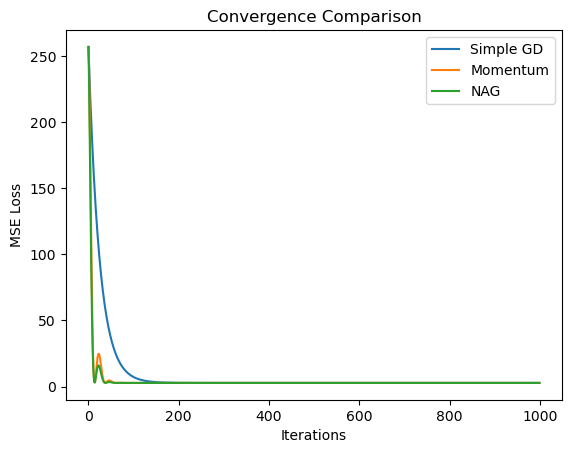

In [18]:
sgd = SimpleGradientDescent(learning_rate=0.01, iterations=1000)
sgd.fit(X, y)

momentum = MomentumGradientDescent(learning_rate=0.01, iterations=1000, gamma=0.9)
momentum.fit(X, y)

nag = NesterovGradientDescent(learning_rate=0.01, iterations=1000, gamma=0.9)
nag.fit(X, y)

# Compare losses
plt.plot(sgd.loss_history, label='Simple GD')
plt.plot(momentum.loss_history, label='Momentum')
plt.plot(nag.loss_history, label='NAG')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Convergence Comparison')
plt.show()
